After splitting the data at significant gaps, the baseline was shorter than twice the length of the period on 5 occasions.
Writing the phase curve to ./260304296/phasecurve.csv ...


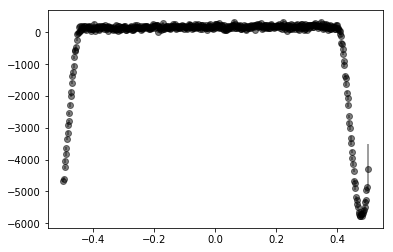

In [2]:
import phasma2 as phasma
import astropy.units as u
import matplotlib.pyplot as plt

tic = 260304296
period = 0.5126 * u.day
event_duration = 1.16 * u.hr
event_epoch = 1325.53
sectors = ['1','2','3','4','5','6','7','8','9','10','11','12','13']

object_of_interest = phasma.Tess(tic, period, event_duration, event_epoch,
                                 sectors)
phase, flux, flux_err = (object_of_interest.phase,
                         object_of_interest.flux,
                         object_of_interest.flux_err)

plt.errorbar(phase, flux, flux_err, fmt='o', alpha=0.5, color='black')
plt.show()

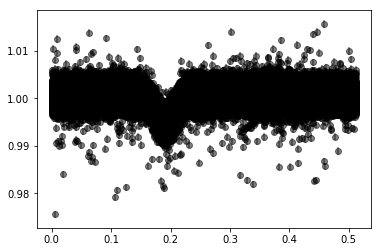

In [2]:
# optional: you can take a look at the raw light curve by calling:
time, fluxraw, flux_errraw = (object_of_interest._raw_time,
                        object_of_interest._raw_flux,
                        object_of_interest._raw_flux_err)
plt.figure()
pd_dimless = 0.5126
plt.errorbar(time%pd_dimless, fluxraw, flux_errraw, fmt='o', alpha=0.5, color='black')
plt.show()

In [2]:
import math
medfluxes = []
step = int(pd_dimless*720)
iterations = 9
for i in range(step):
#     print(i)
    temp = []
    timegap = 0
    for j in range(i, step*iterations):
        timegap += time[j+1]-time[j]
        if (timegap >= pd_dimless):
#             print(timegap)
#             print((time[j] - time[0])/pd_dimless)
            timegap = 0
            temp.append(fluxraw[j])
    medfluxes.append(statistics.median(temp))

offset = -.06
modtime = [t - offset - pd_dimless * math.floor((t-offset)/pd_dimless) for t in time]
    
plt.scatter(modtime[0:step], medfluxes, color='black')
plt.show()

NameError: name 'pd_dimless' is not defined

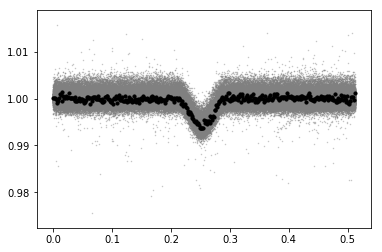

In [72]:
plt.scatter(modtime, fluxraw, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime[0:step], medfluxes, s=10, color='black')
plt.show()

In [51]:
import phasma2 as phasma
import astropy.units as u
import matplotlib.pyplot as plt
import numpy
import sys
import csv

with open('data_withsectors.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    tics = []
    taus = []
    periods = []
    durations = []
    disps = []
    sectors = []
    for row in readCSV:
        tics.append(row[0])
        taus.append(row[1])
        periods.append(row[2])
        durations.append(row[3])
        disps.append(row[4])
        sectors.append(row[5:])
csvfile.close()

In [5]:
def analyze(i):
    object_of_interest = phasma.Tess(int(tics[i]), float(periods[i]) * u.day, float(durations[i])*u.hour, float(taus[i]), sectors[i])
    pd_dimless = float(periods[i])
    step = int(pd_dimless*720)
    return object_of_interest._raw_time, object_of_interest._raw_flux, pd_dimless, step

In [6]:
def analyze(tic, period, duration, tau, sectors):
    object_of_interest = phasma.Tess(int(tic), float(period) * u.day, float(duration)*u.hour, float(tau), sectors)
    pd_dimless = float(period)
    step = int(pd_dimless*720)
    return object_of_interest._raw_time, object_of_interest._raw_flux, pd_dimless, step

In [7]:
def createPhase(time, flux, pd_dimless, step, iterations):
    medfluxes = []
    for i in range(step):
        temp = []
        timegap = 0
        for j in range(i, step*iterations):
            timegap += time[j+1]-time[j]
            if (timegap >= pd_dimless):
                timegap = 0
                temp.append(flux[j])
        medfluxes.append(statistics.median(temp))
    return medfluxes

After splitting the data at significant gaps, the baseline was shorter than twice the length of the period on 5 occasions.
Writing the phase curve to ./260304296/phasecurve.csv ...


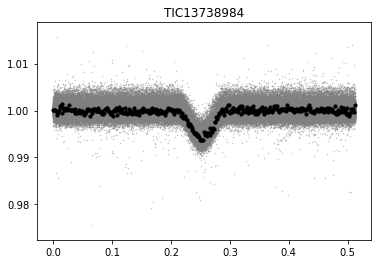

In [215]:
time, flux, pd_dimless, step = analyze(0)
medfluxes = createPhase(time, flux, pd_dimless, step, 9)
offset = -.06
modtime = [t - offset - pd_dimless * math.floor((t-offset)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime[0:step], medfluxes, s=10, color='black')
plt.show()

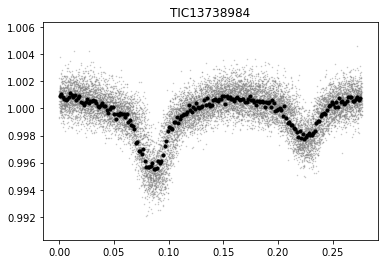

In [227]:
num = 1
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 30)
offset_1 = 0
offset_2 = offset_1
offset_2 = -.016
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

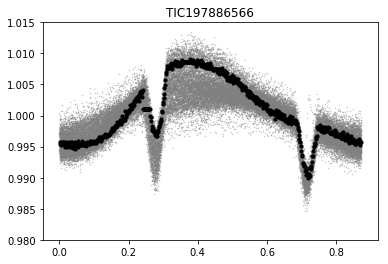

In [15]:
num = 2
# time, flux, pd_dimless, step = analyze(num)
# medfluxes = createPhase(time, flux, pd_dimless, step, 20)
offset_1 = 0
offset_2 = offset_1
# offset_2 = -.016
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.ylim(0.98, 1.015)
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

In [56]:
pd_dimless

0.7032

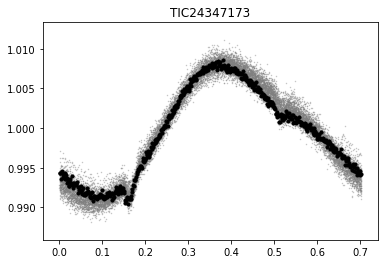

In [60]:
import math
import statistics

num = 3
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 8)
offset_1 = 0
offset_2 = offset_1
# offset_2 = -.016
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

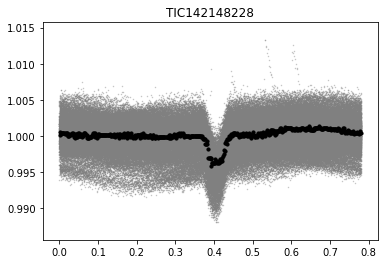

In [270]:
num = 4
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 20)
offset_1 = 0.24
offset_2 = offset_1
offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

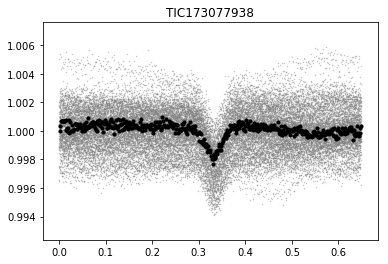

In [273]:
num = 5
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 20)
offset_1 = 0.23
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

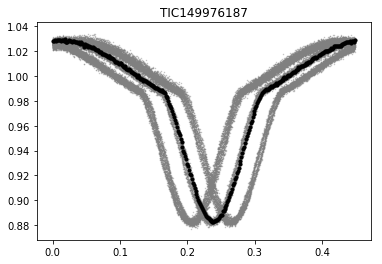

In [368]:
num = 6
# time, flux, pd_dimless, step = analyze(num)

medfluxes = createPhase(time, flux, pd_dimless, step, 20)
offset_1 = 0.06
offset_2 = offset_1
offset_2 += 0.03
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

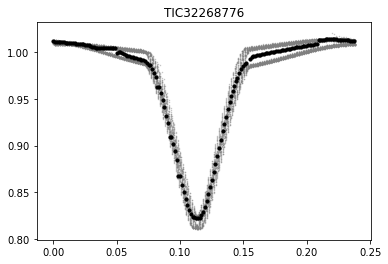

In [310]:
num = 7
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 20)
offset_1 = -.03
offset_2 = offset_1
offset_2 += -.007
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

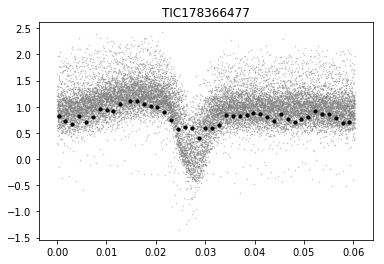

In [329]:
num = 8
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 16)
offset_1 = -.01
offset_2 = offset_1
offset_2 += -.009
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

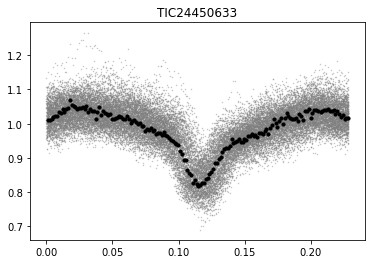

In [338]:
num = 9
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 20)
offset_1 = 0.08
offset_2 = offset_1
offset_2 += -.015
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

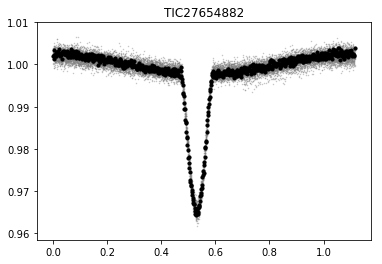

In [340]:
num = 10
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 5)
offset_1 = 0.05
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

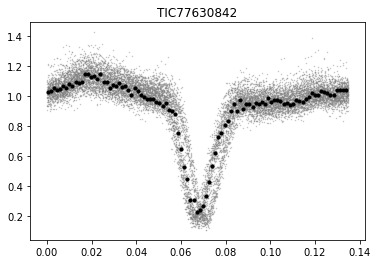

In [345]:
num = 11
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 10)
offset_1 = 0.08
offset_2 = offset_1
offset_2 += -.007
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

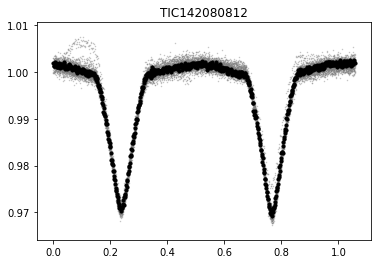

In [358]:
num = 12
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 5)
offset_1 = 0.2
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

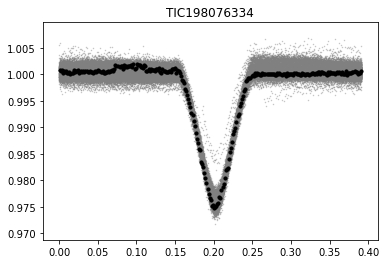

In [362]:
num = 13
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 11)
offset_1 = 0.14
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

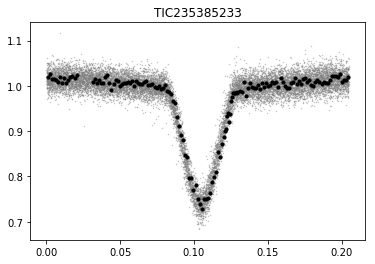

In [373]:
num = 14
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 10)
offset_1 = -.05
offset_2 = offset_1
offset_2 += -.005
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

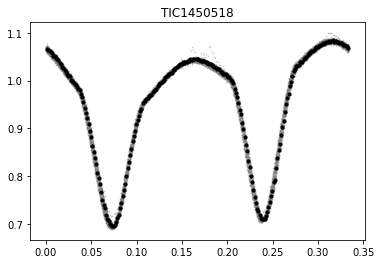

In [379]:
num = 15
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 20)
offset_1 = 0
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

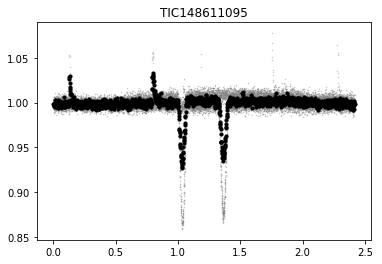

In [396]:
num = 16
# time, flux, pd_dimless, step = analyze(num)
# medfluxes = createPhase(time, flux, pd_dimless, step, 3)
offset_1 = 0.4
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
# plt.scatter(modtime_1[0:step*2], flux[0:step*2], s=10, color='black')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

TIC 423530755 not in sector 
TIC 423530755 not in sector 
TIC 423530755 not in sector 
TIC 423530755 not in sector 
TIC 423530755 not in sector 
TIC 423530755 not in sector 
TIC 423530755 not in sector 
TIC 423530755 not in sector 
TIC 423530755 not in sector 
TIC 423530755 not in sector 
TIC 423530755 not in sector 
TIC 423530755 not in sector 
Writing the phase curve to ./423530755/phasecurve.csv ...


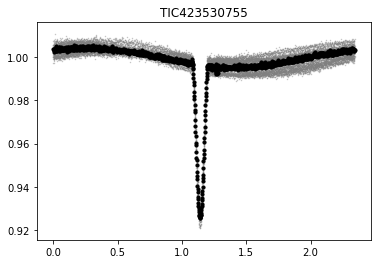

In [397]:
num = 17
time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 3)
offset_1 = 0.4
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

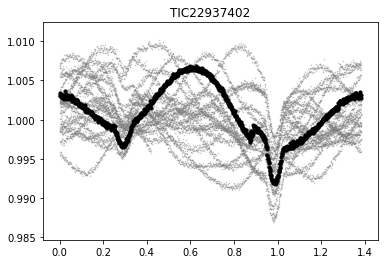

In [46]:
num = 18
# time, flux, pd_dimless, step = analyze(num)
# pd_dimless = 0.6919 * 2
# medfluxes = createPhase(time, flux, pd_dimless, step, 3)
offset_1 = 0.3
offset_2 = offset_1
# offset_2 += .1
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

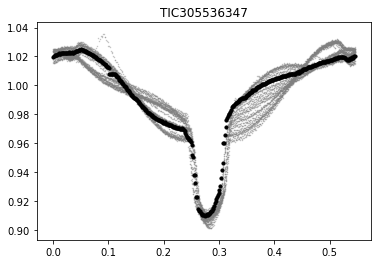

In [422]:
num = 19
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 25)
offset_1 = 0.32
offset_2 = offset_1
offset_2 += -.003
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

In [19]:
sectors[20] = ['3', '6', '10', '11', '12', '13']

In [20]:
#272551828
num = 20
time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 10)
offset_1 = 0.4
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

After splitting the data at significant gaps, the baseline was shorter than twice the length of the period on 3 occasions.


ValueError: cannot reshape array of size 0 into shape (0,newaxis)

TIC 48372732 not in sector 
TIC 48372732 not in sector 
TIC 48372732 not in sector 
TIC 48372732 not in sector 
TIC 48372732 not in sector 
TIC 48372732 not in sector 
TIC 48372732 not in sector 
TIC 48372732 not in sector 
TIC 48372732 not in sector 
TIC 48372732 not in sector 
TIC 48372732 not in sector 
TIC 48372732 not in sector 
After splitting the data at significant gaps, the baseline was shorter than twice the length of the period on 1 occasions.
Writing the phase curve to ./48372732/phasecurve.csv ...


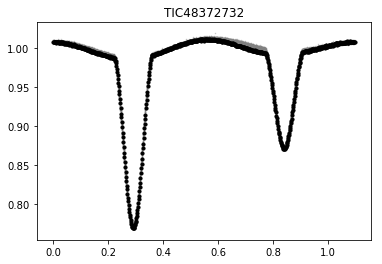

In [431]:
num = 21
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 3)
offset_1 = 0.5
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

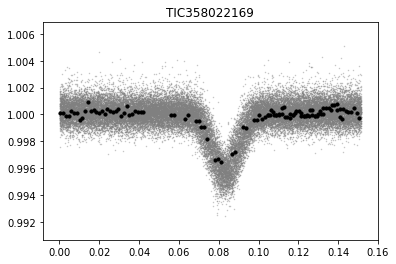

In [445]:
num = 22
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 15)
offset_1 = 0.075
offset_2 = offset_1
offset_2 += -.011
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

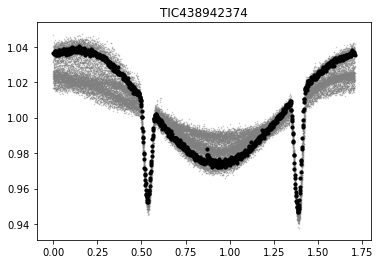

In [460]:
num = 23
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 10)
offset_1 = 0
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

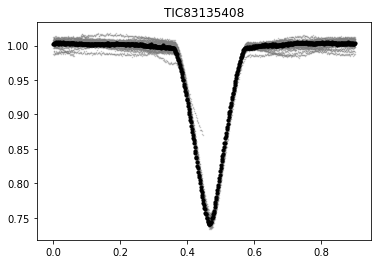

In [462]:
num = 24
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 10)
offset_1 = 0.1
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

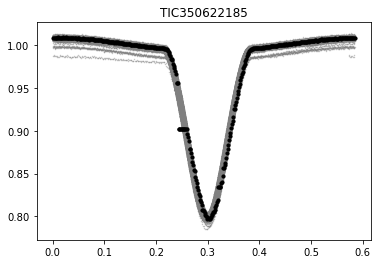

In [465]:
num = 25
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 10)
offset_1 = 0.06
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

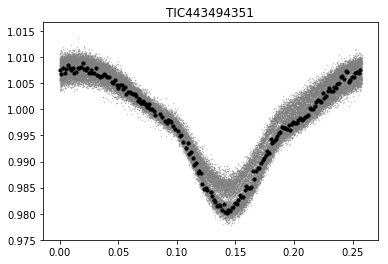

In [471]:
num = 26
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 10)
offset_1 = 0.062
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

TIC 123405765 not in sector 
TIC 123405765 not in sector 
TIC 123405765 not in sector 
TIC 123405765 not in sector 
TIC 123405765 not in sector 
TIC 123405765 not in sector 
TIC 123405765 not in sector 
TIC 123405765 not in sector 
TIC 123405765 not in sector 
TIC 123405765 not in sector 
TIC 123405765 not in sector 
TIC 123405765 not in sector 
Writing the phase curve to ./123405765/phasecurve.csv ...


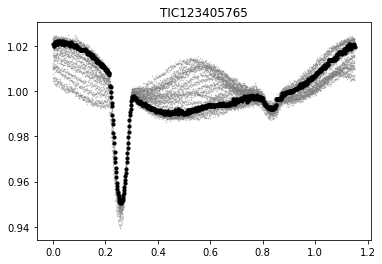

In [472]:
num = 27
time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 10)
offset_1 = 0
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

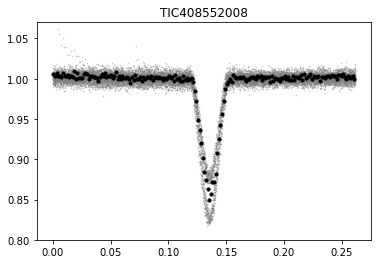

In [10]:
import statistics
num = 28
# time, flux, pd_dimless, step = analyze(num)
# medfluxes = createPhase(time, flux, pd_dimless, step, 10)
offset_1 = 0.05
offset_2 = offset_1
offset_2 += -.004
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.ylim(0.8,1.07)
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

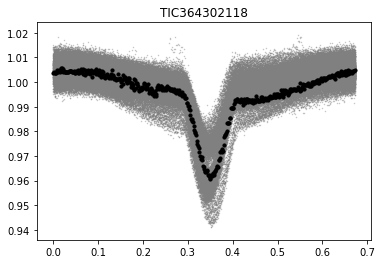

In [481]:
num = 29
# time, flux, pd_dimless, step = analyze(num)
medfluxes = createPhase(time, flux, pd_dimless, step, 15)
offset_1 = 0.2
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tics[num])
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

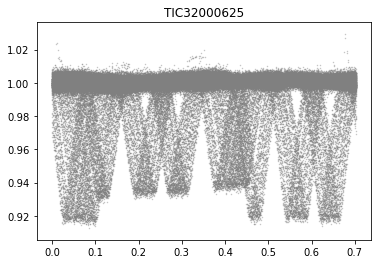

In [12]:
# import statistics
# import math

# time, flux, pd_dimless, step = analyze("32000625", 0.702441159, 1, 1325.6118065252083, ['1', '2', '3', '6', '7', '9', '10', '13'])
# medfluxes = createPhase(time, flux, pd_dimless, step, 15)
offset_1 = 0.2
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tic)
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
# plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

After splitting the data at significant gaps, the baseline was shorter than twice the length of the period on 2 occasions.
Writing the phase curve to ./260161144/phasecurve.csv ...


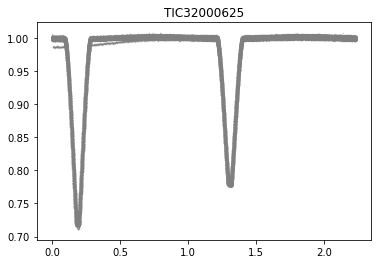

In [119]:
time, flux, pd_dimless, step = analyze("260161144", 2.234288822, 1, 1325.7127907434387, ['1', '2', '4', '5', '6', '7', '9', '10', '11', '12'])
medfluxes = createPhase(time, flux, pd_dimless, step, 15)
offset_1 = 0.2
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tic)
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
# plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

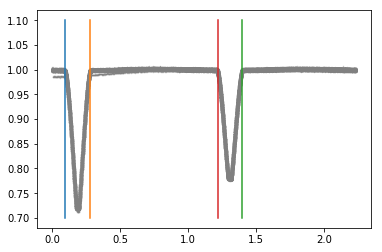

In [120]:
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.plot([0.1,0.1], [0.7,1.1])
plt.plot([0.28,0.28], [0.7,1.1])
plt.plot([1.4,1.4], [0.7,1.1])
plt.plot([1.22,1.22], [0.7,1.1])
plt.show()

In [86]:
# larger dip
df = pd.DataFrame(data={'modt':modtime_1, 'flux':flux})
outsidedip = df[(df['modt'] < 0.1) | (df['modt'] > 1.4)] # (df['modt'] > 0.28 & df['modt'] < 1.22) | 
insidedip = df[(df['modt'] >  0.08) & (df['modt'] < 0.26)]

In [80]:
insidefluxes = insidedip['flux']
outsidefluxes = outsidedip['flux']
print("<flux inside dip> = " + str(sum(insidefluxes)/len(insidefluxes)))
print("<flux outside dip> = " + str(sum(outsidefluxes)/len(outsidefluxes)))
print("diff = " + str(sum(insidefluxes)/len(insidefluxes) - sum(outsidefluxes)/len(outsidefluxes)))

<flux inside dip> = 0.8605454751423427
<flux outside dip> = 1.0003350555360708
diff = -0.13978958039372813


In [85]:
print("<stdev inside dip> / <# of points inside dip> = " + str(statistics.stdev(insidefluxes)/len(insidefluxes)))

<stdev inside dip> / <# of points inside dip> = 7.329563065118579e-06


In [121]:
# smaller dip
df = pd.DataFrame(data={'modt':modtime_1, 'flux':flux})
outsidedip = df[(df['modt'] < 0.1) | (df['modt'] > 1.4)] # (df['modt'] > 0.28 & df['modt'] < 1.22) | 
insidedip = df[(df['modt'] >  1.22) & (df['modt'] < 1.4)]

In [122]:
insidefluxes = insidedip['flux']
outsidefluxes = outsidedip['flux']
print("<flux inside dip> = " + str(sum(insidefluxes)/len(insidefluxes)))
print("<flux outside dip> = " + str(sum(outsidefluxes)/len(outsidefluxes)))
print("diff = " + str(sum(insidefluxes)/len(insidefluxes) - sum(outsidefluxes)/len(outsidefluxes)))

<flux inside dip> = 0.8850522545926589
<flux outside dip> = 1.0003350555360708
diff = -0.11528280094341192


In [123]:
print("<stdev inside dip> / <# of points inside dip> = " + str(statistics.stdev(insidefluxes)/len(insidefluxes)))

<stdev inside dip> / <# of points inside dip> = 5.3922355858702565e-06


After splitting the data at significant gaps, the baseline was shorter than twice the length of the period on 4 occasions.
Writing the phase curve to ./279569707/phasecurve.csv ...


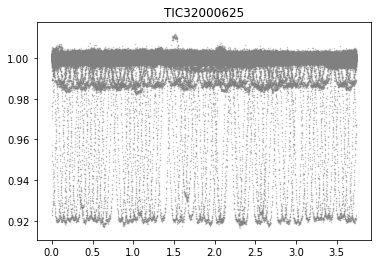

In [87]:
time, flux, pd_dimless, step = analyze("279569707", 3.739826441, 1, 1354.5273499733298, ['2', '3', '4', '5', '6', '7', '8', '9', '10', '12', '13'])
medfluxes = createPhase(time, flux, pd_dimless, step, 15)
offset_1 = 0.2
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tic)
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
# plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

Writing the phase curve to ./234494090/phasecurve.csv ...


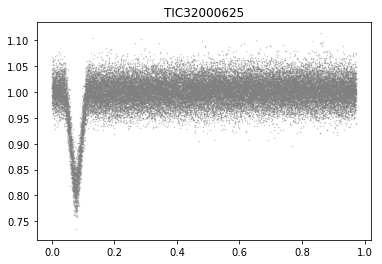

In [89]:
time, flux, pd_dimless, step = analyze("234494090", 0.972626507, 1, 1325.5049539983909, ['1', '2'])
medfluxes = createPhase(time, flux, pd_dimless, step, 15)
offset_1 = 0.1
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tic)
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
# plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

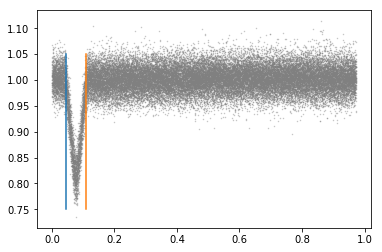

In [96]:
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.plot([0.045, 0.045], [0.75, 1.05])
plt.plot([0.11, 0.11], [0.75, 1.05])
plt.show()

In [97]:
df = pd.DataFrame(data={'modt':modtime_1, 'flux':flux})
outsidedip = df[(df['modt'] < 0.045) | (df['modt'] > 0.11)] # (df['modt'] > 0.28 & df['modt'] < 1.22) | 
insidedip = df[(df['modt'] >  0.045) & (df['modt'] < 0.1)]

In [98]:
insidefluxes = insidedip['flux']
outsidefluxes = outsidedip['flux']
print("<flux inside dip> = " + str(sum(insidefluxes)/len(insidefluxes)))
print("<flux outside dip> = " + str(sum(outsidefluxes)/len(outsidefluxes)))
print("diff = " + str(sum(insidefluxes)/len(insidefluxes) - sum(outsidefluxes)/len(outsidefluxes)))

<flux inside dip> = 0.8821874078179041
<flux outside dip> = 1.0021199848499251
diff = -0.11993257703202109


In [99]:
print("<stdev inside dip> / <# of points inside dip> = " + str(statistics.stdev(insidefluxes)/len(insidefluxes)))

<stdev inside dip> / <# of points inside dip> = 2.6906563135817016e-05


Writing the phase curve to ./143924219/phasecurve.csv ...


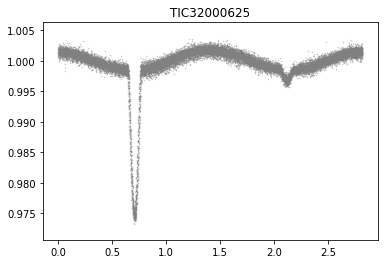

In [102]:
time, flux, pd_dimless, step = analyze("143924219", 2.821498108, 1, 1326.0387157315472, ['1'])
# medfluxes = createPhase(time, flux, pd_dimless, step, 15)
offset_1 = 0
offset_2 = offset_1
# offset_2 += -.012
modtime_1 = [t - offset_1 - pd_dimless * math.floor((t-offset_1)/pd_dimless) for t in time]
modtime_2 = [t - offset_2 - pd_dimless * math.floor((t-offset_2)/pd_dimless) for t in time]
    
plt.figure()
plt.title("TIC"+tic)
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
# plt.scatter(modtime_2[0:step], medfluxes, s=10, color='black')
plt.show()

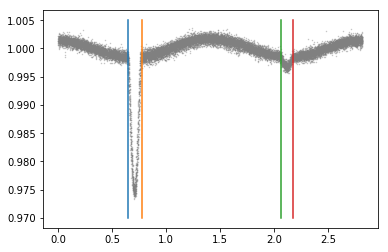

In [115]:
plt.scatter(modtime_1, flux, alpha=0.5, s=0.2, color='gray')
plt.plot([0.65, 0.65], [0.97, 1.005])
plt.plot([0.78, 0.78], [0.97, 1.005])
plt.plot([2.07, 2.07], [0.97, 1.005])
plt.plot([2.18, 2.18], [0.97, 1.005])
plt.show()

In [107]:
#larger dip

df = pd.DataFrame(data={'modt':modtime_1, 'flux':flux})
outsidedip = df[(df['modt'] < 0.65) | (df['modt'] > 0.78)] # (df['modt'] > 0.28 & df['modt'] < 1.22) | 
insidedip = df[(df['modt'] >  0.65) & (df['modt'] < 0.78)]

In [108]:
insidefluxes = insidedip['flux']
outsidefluxes = outsidedip['flux']
print("<flux inside dip> = " + str(sum(insidefluxes)/len(insidefluxes)))
print("<flux outside dip> = " + str(sum(outsidefluxes)/len(outsidefluxes)))
print("diff = " + str(sum(insidefluxes)/len(insidefluxes) - sum(outsidefluxes)/len(outsidefluxes)))

<flux inside dip> = 0.9855555407702923
<flux outside dip> = 1.000058850435831
diff = -0.0145033096655387


In [109]:
print("<stdev inside dip> / <# of points inside dip> = " + str(statistics.stdev(insidefluxes)/len(insidefluxes)))

<stdev inside dip> / <# of points inside dip> = 9.52729966066856e-06


In [116]:
#smaller dip

df = pd.DataFrame(data={'modt':modtime_1, 'flux':flux})
outsidedip = df[(df['modt'] < 0.65) | (df['modt'] > 0.78)] # (df['modt'] > 0.28 & df['modt'] < 1.22) | 
insidedip = df[(df['modt'] >  0.78) & (df['modt'] < 0.97)]

In [117]:
insidefluxes = insidedip['flux']
outsidefluxes = outsidedip['flux']
print("<flux inside dip> = " + str(sum(insidefluxes)/len(insidefluxes)))
print("<flux outside dip> = " + str(sum(outsidefluxes)/len(outsidefluxes)))
print("diff = " + str(sum(insidefluxes)/len(insidefluxes) - sum(outsidefluxes)/len(outsidefluxes)))

<flux inside dip> = 0.9989434864062735
<flux outside dip> = 1.000058850435831
diff = -0.0011153640295574752


In [118]:
print("<stdev inside dip> / <# of points inside dip> = " + str(statistics.stdev(insidefluxes)/len(insidefluxes)))

<stdev inside dip> / <# of points inside dip> = 5.12907218657296e-07
